In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
path = "D:/IBM - Internship/Data Analysis Using Python/Automobile_Price_prediction/CAR_DATA/Car_clean_df.csv"
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak- rpm,city-mpg,highway-mpg,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-type-std,turbo
0,3,121.742331,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.480113,...,111.0,5000.0,21,27,13495,Low,0,1,1,0
1,3,121.742331,alfa-romero,two,convertible,rwd,front,88.6,0.413433,0.324786,...,111.0,5000.0,21,27,16500,Low,0,1,1,0
2,2,164.000000,audi,four,sedan,4wd,front,99.4,0.529851,0.521368,...,115.0,5500.0,18,22,17450,Low,0,1,1,0
3,2,121.742331,audi,two,sedan,fwd,front,99.8,0.540299,0.512821,...,110.0,5500.0,19,25,15250,Low,0,1,1,0
4,1,158.000000,audi,four,sedan,fwd,front,105.8,0.770149,0.948718,...,110.0,5500.0,19,25,17710,Low,0,1,1,0


# Simple Linear Regression 

In [3]:
x = df[["engine-size"]]
y = df["price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
lm = LinearRegression()
lm

LinearRegression()

In [6]:
lm.fit(x_train,y_train)

LinearRegression()

In [7]:
y_hat = lm.predict(x_test)
y_hat[1:10]

array([ 2823.54771856, 17195.42973821, 10404.320652  , 12457.44665481,
       16247.83312153, 41832.94177191, 30145.91683285, 17037.49696877,
       20196.1523577 ])

In [8]:
lm.intercept_

-6810.3512176947315

In [9]:
lm.coef_

array([157.93276945])

In [10]:
lm.score(x_test,y_test)

0.8422341060980354

In [11]:
import seaborn as sns


<AxesSubplot: xlabel='highway-mpg', ylabel='price'>

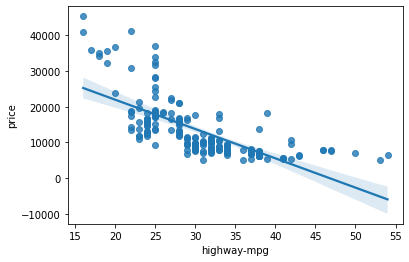

In [12]:
sns.regplot(x="highway-mpg", y="price", data=df)

# Multiple Linear Regression

In [13]:
df['stroke'].fillna(df["stroke"].mean(),inplace = True)
df["stroke"].isnull().sum()

0

In [14]:
x = df[ [
'wheel-base',
'length',
'width',
'curb-weight',
'engine-size',
'bore',
'horsepower',
'city-mpg',
'highway-mpg',
]]

y = df["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [15]:
lm.fit(x_train,y_train)

LinearRegression()

In [16]:
lm.fit(x_train,y_train)

LinearRegression()

In [17]:
y_hat = lm.predict(x_test)
y_hat[1:10]

array([ -648.27570351, 17673.1971637 , 10091.85508443, 10883.85683164,
       14060.82032591, 35506.63461973, 27012.17494787, 17588.53304335,
       22012.66112667])

In [18]:
lm.score(x_test,y_test)

0.8077745470481769

C:\Users\patel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\patel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


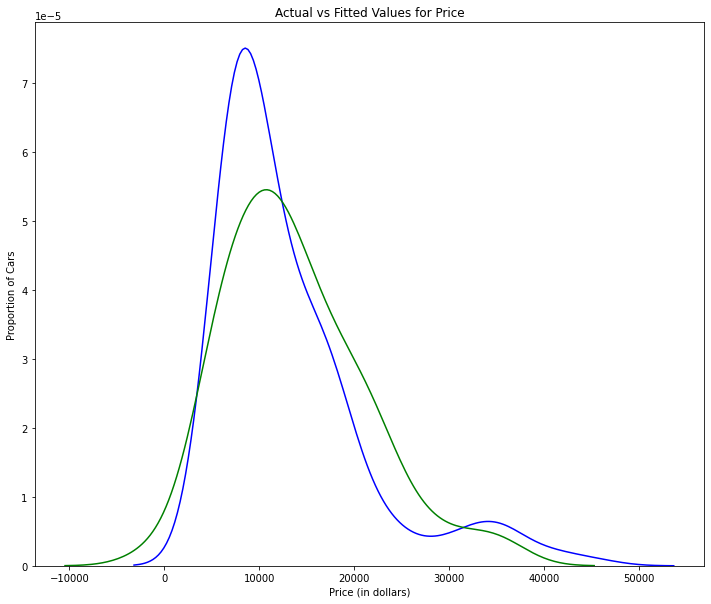

In [19]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="b", label="Actual Value")
sns.distplot(y_hat, hist=False, color="g", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Multiple Linear Regression Using Pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [21]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [22]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [23]:
x = df[[
'wheel-base',
'length',
'width',
'curb-weight',
'engine-size',
'bore',
'horsepower',
'city-mpg',
'highway-mpg',
]].astype("float")

y = df["price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)


In [24]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [25]:
y_hat = pipe.predict(x_test)
y_hat[1:10]

array([ 6393.27712873, 17428.32574658,  8048.81933276,  8997.96646767,
       10560.31833217, 60016.45601355, 41400.27183331, 21541.37231402,
       17428.75579915])

In [26]:
pipe.score(x_test,y_test)

0.7372294392524101

C:\Users\patel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\patel\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


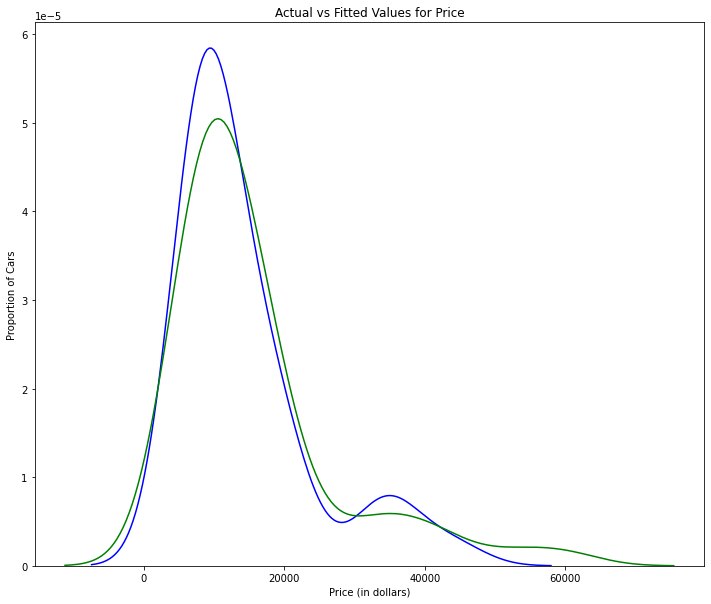

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))

ax1 = sns.distplot(y_test, hist=False, color="b", label="Actual Value")
sns.distplot(y_hat, hist=False, color="g", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mean_squared_error(y_test,y_hat)

23334276.585820794